<a href="https://colab.research.google.com/github/A0143704/TC4033-Vision-C-Equipo-3/blob/main/Equipo_3_5_frequency_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

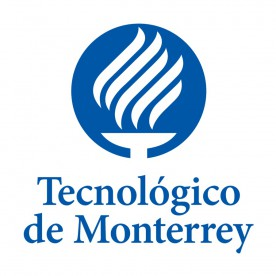


#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Visión computacional para imágenes y video (Gpo 10)**
###Tecnológico de Monterrey
### **Prof Dr. Gilberto Ochoa Ruiz**
### *5.3 Algoritmos de mejoramiento de imágenes en el dominio de Fourier*

# **Equipo 3**

<center>

|   |   |
|---|---|
| Matrícula | Alumno|
| A01793474   | Juan Pablo Bladinieres Martin del Campo|
| A01793546  | José Ariel Corral|
| A01794050  | José Bernardo Moreno Villarreal|
| A01021190   | Ian André Ortega Suárez|
| A00143704   | Moisés Rangel Silva  |

</center>



## 5.3 Frequency Fourier Domain

## Table of Contents
1. [Libraries](#libraries)
2. [Fast Fourier Transform (FFT)](#fft)
3. [Low Pass Filter](#low)
4. [High Pass Filter](#high)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp

## Fast Fourier Transform (FFT) <a class="anchor" id="fft" ></a>

## **Sección 5.3**

# Algoritmos de mejoramiento de imágenes en el dominio de Fourier

## *Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasabajas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos (Ideal, el Butterworth y el Gaussian)*

En el caso de la biologia e investigación de microorganismos se utilizan los filtros para mejorar las imagenes de microscopía fluorecente.se utiliza para el resalte de las estructuras mitocondriales y para visualizar mejor el núcleo de las celulas. 

Trinidad Torres, F. A. (2017). Transformada de Fourier y su aplicaci ́on en procesamiento digital de im ́agenes (Benemérita Universidad Autónoma de Puebla, Puebla). Recuperado de https://www.fcfm.buap.mx/assets/docs/docencia/tesis/ma/FlorAngelicaTrinidadTorres.pdf

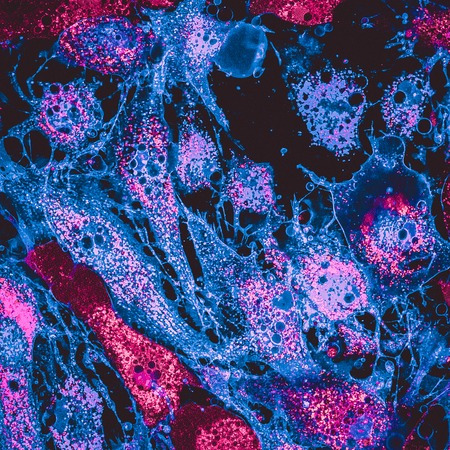

# Preparación de los filtros

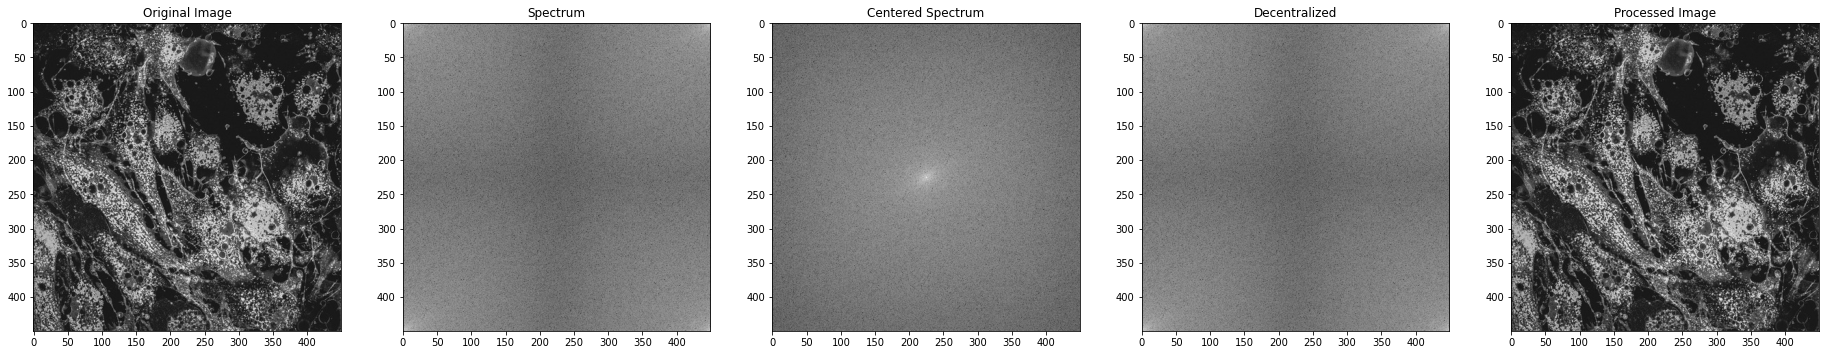

In [4]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("/content/data/Celula.jpeg", 0)
plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(152), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(153), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

inv_center = np.fft.ifftshift(center)
plt.subplot(154), plt.imshow(np.log(1+np.abs(inv_center)), "gray"), plt.title("Decentralized")

processed_img = np.fft.ifft2(inv_center)
plt.subplot(155), plt.imshow(np.abs(processed_img), "gray"), plt.title("Processed Image")

plt.show()

In [6]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

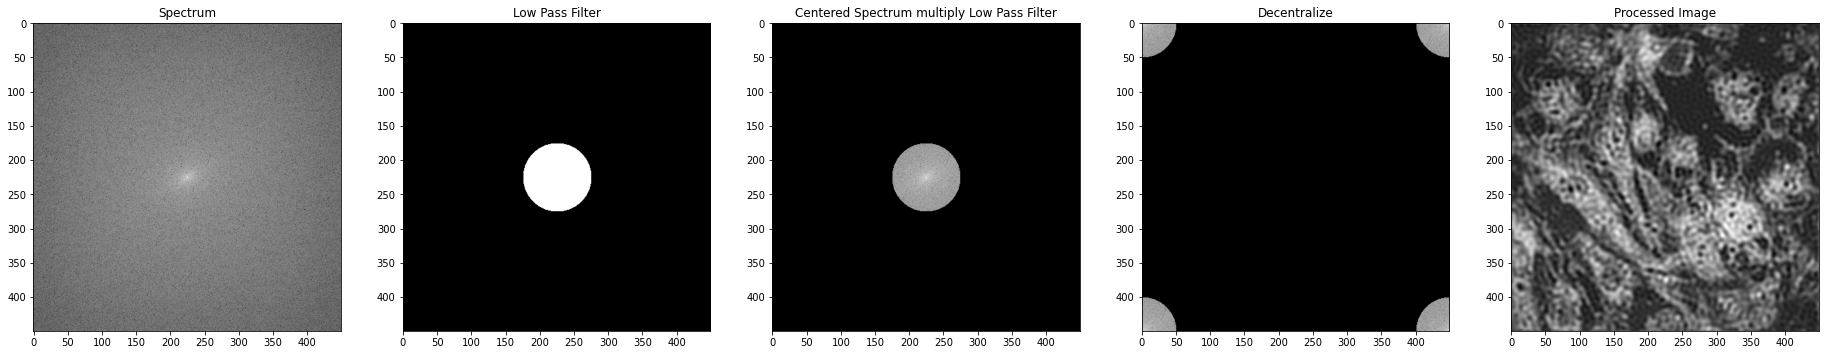

In [7]:
img = cv2.imread("/content/data/Celula.jpeg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

LowPass = idealFilterLP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(LowPass), "gray"), plt.title("Low Pass Filter")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(155), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

## Aplicación de mejoramiento de imágenes usando transformada de Fourier con **filtro pasabajas**. 

En el filtro pasa bajas se logra el efecto de suavizado de la imagen, cuyos usos ayudan a eliminar efectos de pixeleado.

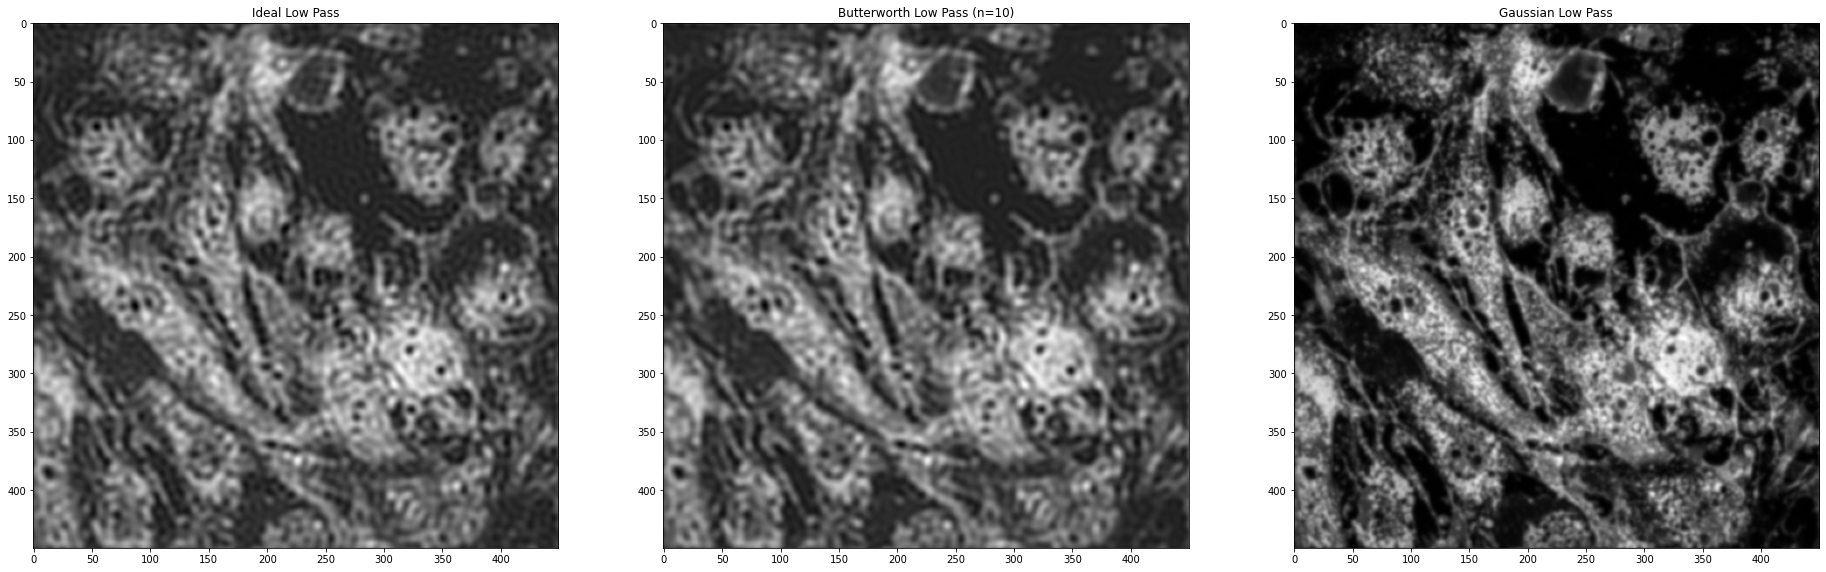

In [8]:
img = cv2.imread("/content/data/Celula.jpeg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPassCenter = center * idealFilterLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(131), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Ideal Low Pass")

LowPassCenter = center * butterworthLP(50,img.shape,10)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (n=10)")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(133), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

plt.show()

## Aplicación de mejoramiento de imágenes usando transformada de Fourier con filtro **pasa altas**

## El uso de un filtro pasa altas consite en hacer una imagen más detallada. Por ejemplo ver con mayor precisión los detalles de líneas o áreas muy especificas de las imágenes, es decir afina la imagen.

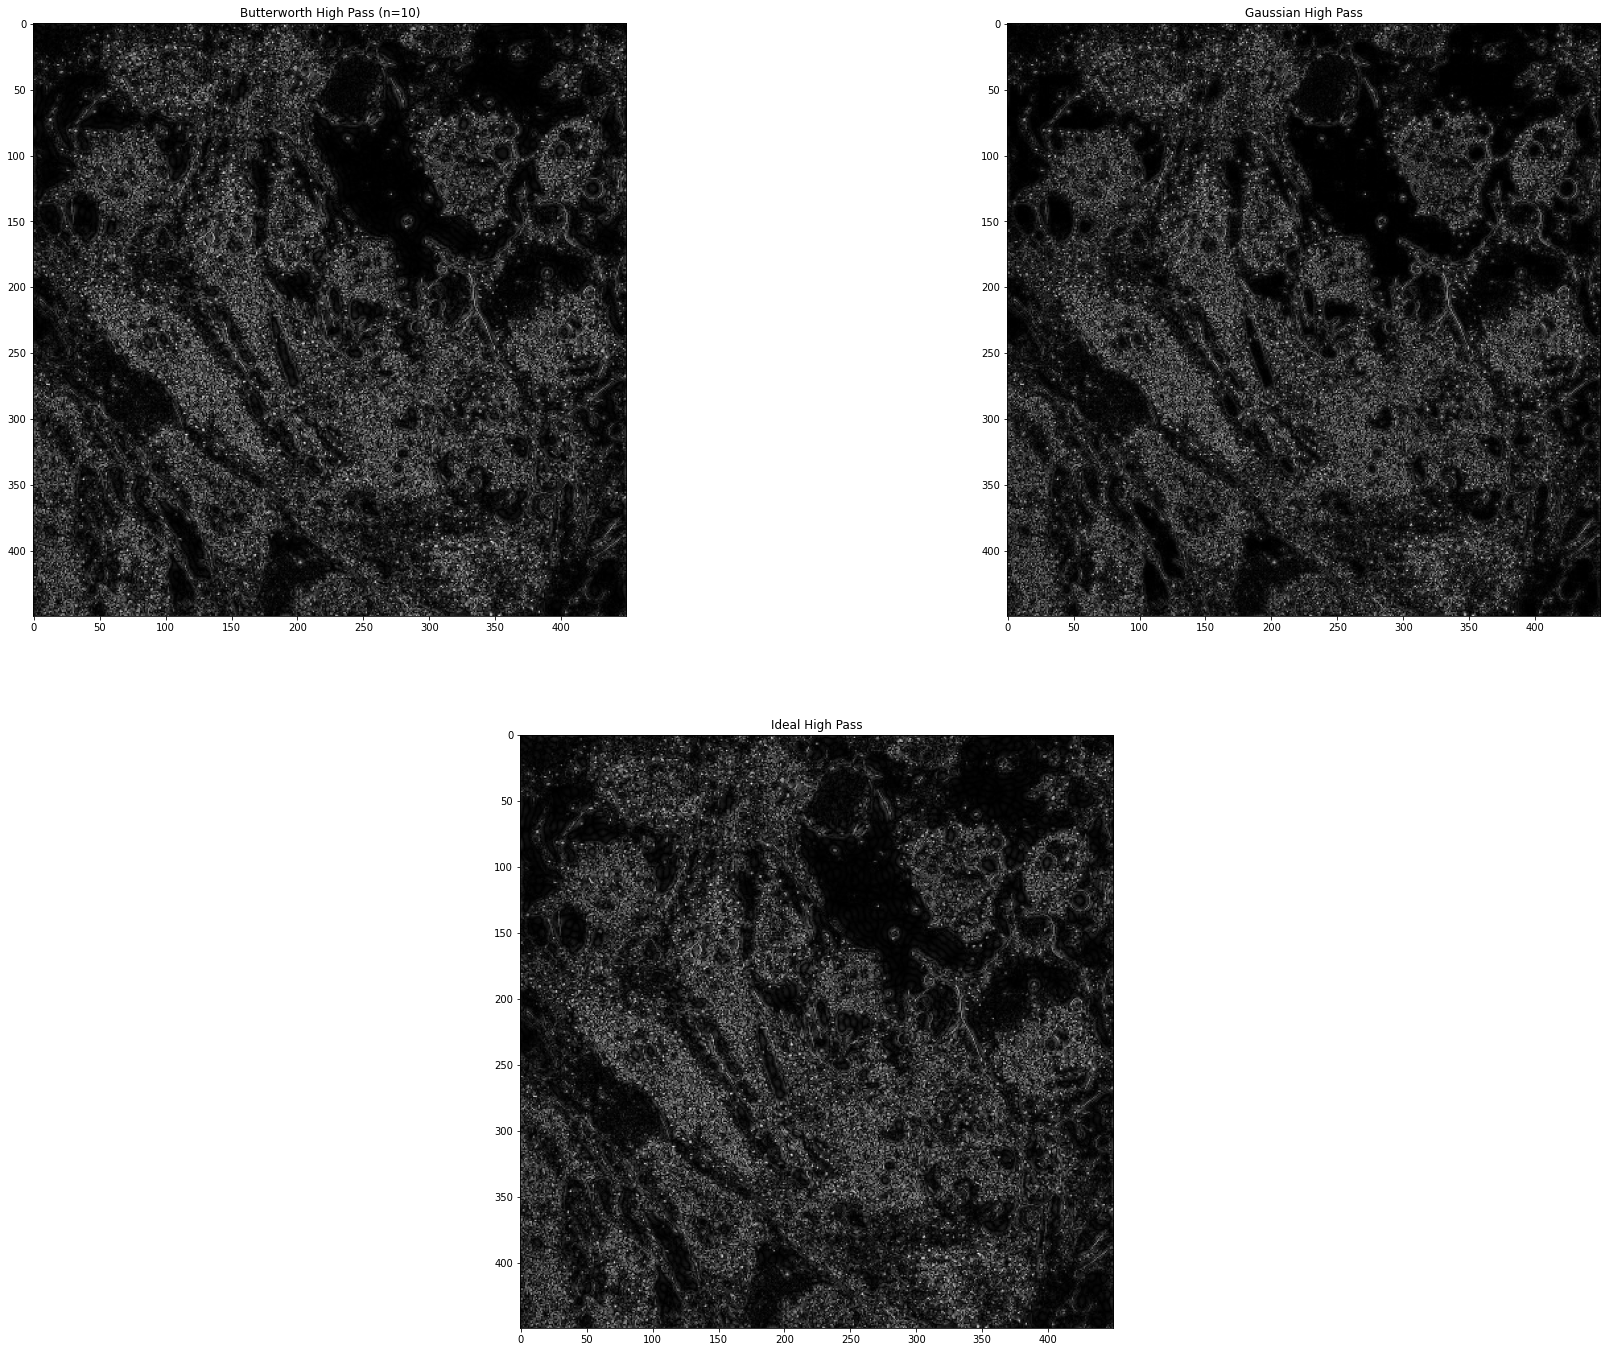

In [9]:
img = cv2.imread("/content/data/Celula.jpeg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

HighPassCenter = center * idealFilterHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(212), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Ideal High Pass")

HighPassCenter = center * butterworthHP(50,img.shape,10)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(221), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Butterworth High Pass (n=10)")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(222), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

## **Conclusión**

# Los filtros pasabandas (altas y bajas) son parte fundamental del procesamiento de imagen, nos permiten aplicar funciones de mejoramiento de imagen dependiendo de nuestra situación o tipo ade anlisis que se realiza.

# Con el **pasabajas** logramos un efecto de suavizado de la imagen, cuyos usos nos ayudan a eliminar efectos de pixeleado y eliminar efectos para mejorar el enfoque sobre un elemento en especifico. Es importante notar que los filtros pasabajas pueden ocasionar un error llamado ringing ocasionado por altas frecuencias. El uso de un Filtro Gaussiano es común para evitar esto.

# Para el **pasa altas**, podemos resaltar detalles, como por ejemplo los núcleos de alguna célula en una imagen. Afina los elementos.